<a href="https://colab.research.google.com/github/MeeTK26/30DaysOfMLDL/blob/main/FashionMnistDataANN(day17).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD


def create_model(activation='relu', optimizer='adam', learning_rate=0.001):
    model = Sequential([
        Dense(128, input_shape=(28 * 28,), activation=activation),
        Dense(64, activation=activation),
        Dense(10, activation='softmax')
    ])
    opt = Adam(learning_rate=learning_rate) if optimizer == 'adam' else SGD(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

model = KerasClassifier(model=create_model, verbose=0)

param_dist = {
    'model__activation': ['relu', 'tanh'],
    'model__optimizer': ['adam', 'sgd'],
    'model__learning_rate': [0.001, 0.01, 0.0001],
    'batch_size': [32, 64],
    'epochs': [5, 10]
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

In [5]:
random_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


RandomizedSearchCV(cv=3,
                   estimator=KerasClassifier(model=<function create_model at 0x78585074ab60>, verbose=0),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'batch_size': [32, 64],
                                        'epochs': [5, 10],
                                        'model__activation': ['relu', 'tanh'],
                                        'model__learning_rate': [0.001, 0.01,
                                                                 0.0001],
                                        'model__optimizer': ['adam', 'sgd']},
                   random_state=42, scoring='accuracy')

In [6]:

print("Best Hyperparameters:", random_search.best_params_)
print(f"Test Accuracy: {random_search.best_estimator_.score(X_test, y_test):.4f}")

Best Hyperparameters: {'model__optimizer': 'adam', 'model__learning_rate': 0.001, 'model__activation': 'relu', 'epochs': 5, 'batch_size': 64}
Test Accuracy: 0.8728


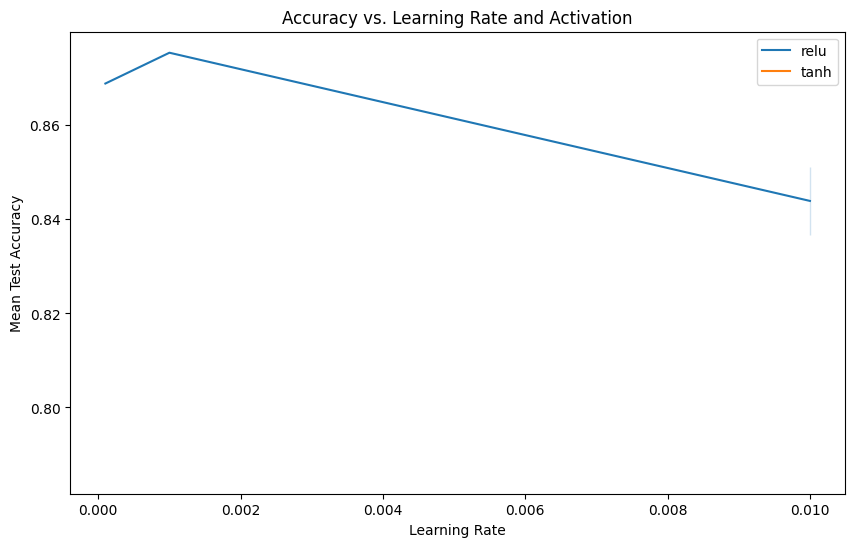

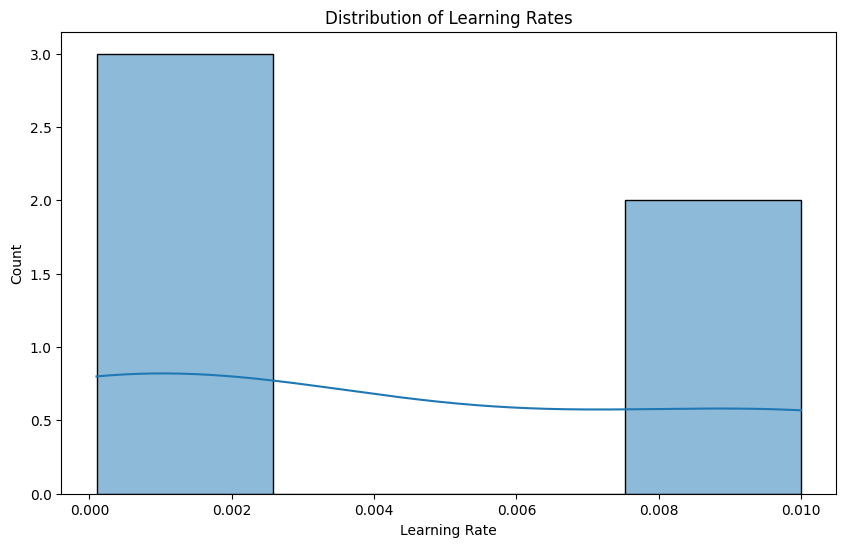

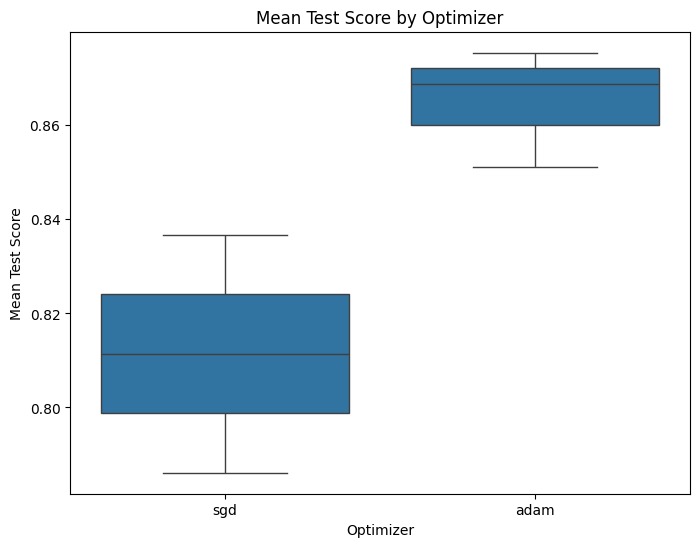

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


results = random_search.cv_results_
plt.figure(figsize=(10, 6))
sns.lineplot(x=results['param_model__learning_rate'], y=results['mean_test_score'], hue=results['param_model__activation'])
plt.xlabel("Learning Rate")
plt.ylabel("Mean Test Accuracy")
plt.title("Accuracy vs. Learning Rate and Activation")
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(results['param_model__learning_rate'], kde=True)
plt.title('Distribution of Learning Rates')
plt.xlabel('Learning Rate')
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x='param_model__optimizer', y='mean_test_score', data=random_search.cv_results_)
plt.title('Mean Test Score by Optimizer')
plt.xlabel('Optimizer')
plt.ylabel('Mean Test Score')
plt.show()


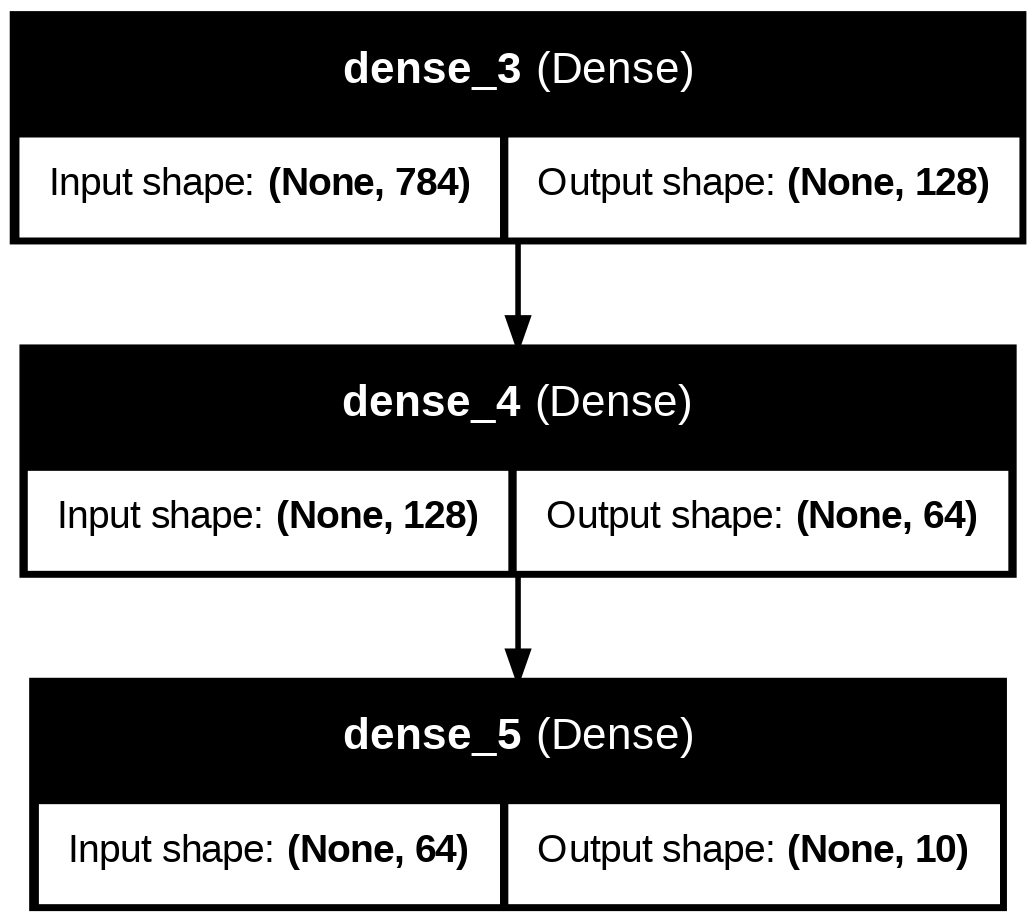

In [10]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

best_model = random_search.best_estimator_.model_

plot_model(best_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
